In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

BASE_DIR = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/"

NUM_IMAGES_TO_TEST = 5

CHECKPOINT_PATH = "./checkpoints/sam2.1_hiera_large.pt"
MODEL_CFG_PATH = "configs/sam2.1/sam2.1_hiera_l.yaml"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

GRID_SIZE = 32

In [2]:
CLASS_NAME = "bottle"
image_dir = os.path.join(BASE_DIR, CLASS_NAME, "test", "broken_large")
gt_dir = os.path.join(BASE_DIR, CLASS_NAME, "ground_truth", "broken_large")

try:
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])[:NUM_IMAGES_TO_TEST]
    
    gt_files = []
    for f in image_files:
        gt_filename = f.replace(".png", "_mask.png")
        if os.path.exists(os.path.join(gt_dir, gt_filename)):
            gt_files.append(gt_filename)
        else:
            gt_files.append(None)

except FileNotFoundError:
    print(f"오류")
    exit()

In [ ]:
print(f"Using device: {DEVICE}")
predictor = SAM2ImagePredictor(build_sam2(MODEL_CFG_PATH, CHECKPOINT_PATH, device=DEVICE))
print("SAM2ImagePredictor has been initialized.")


Processing 000.png...


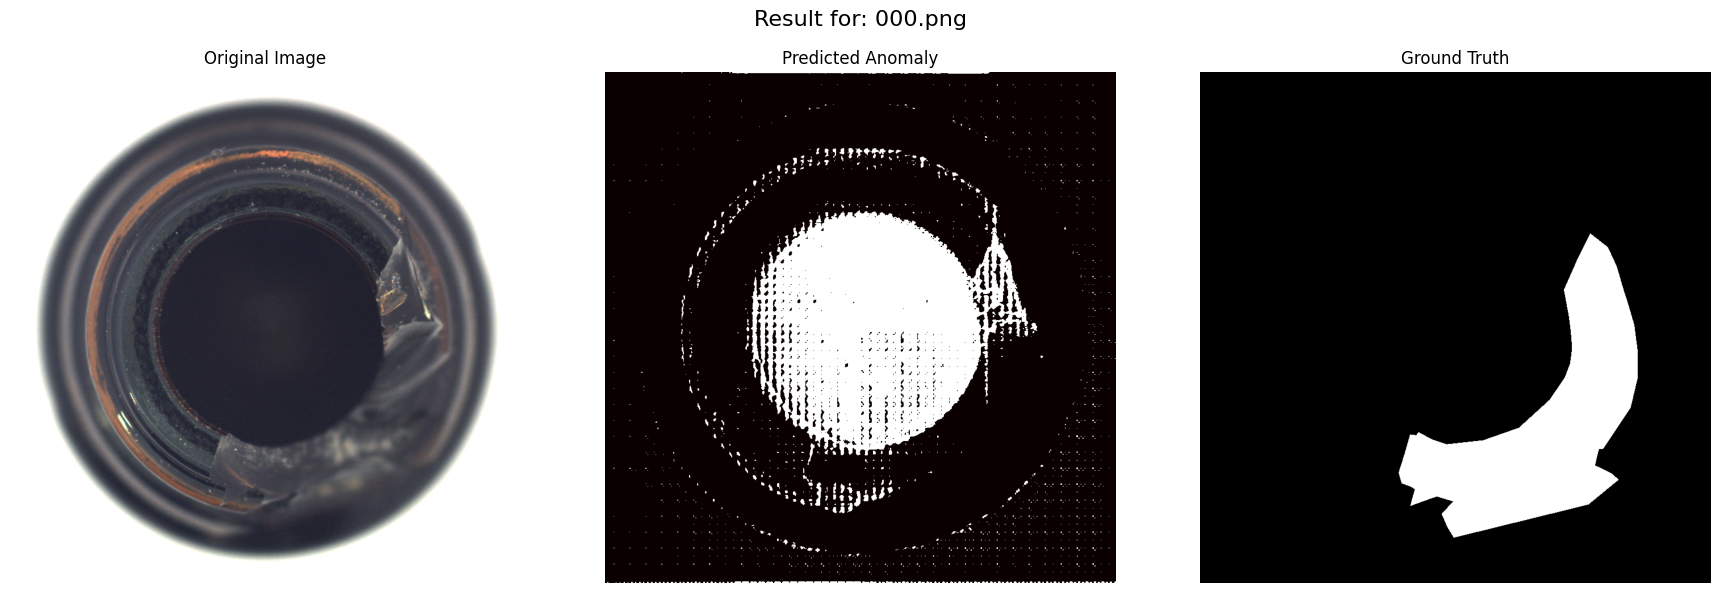


Processing 001.png...


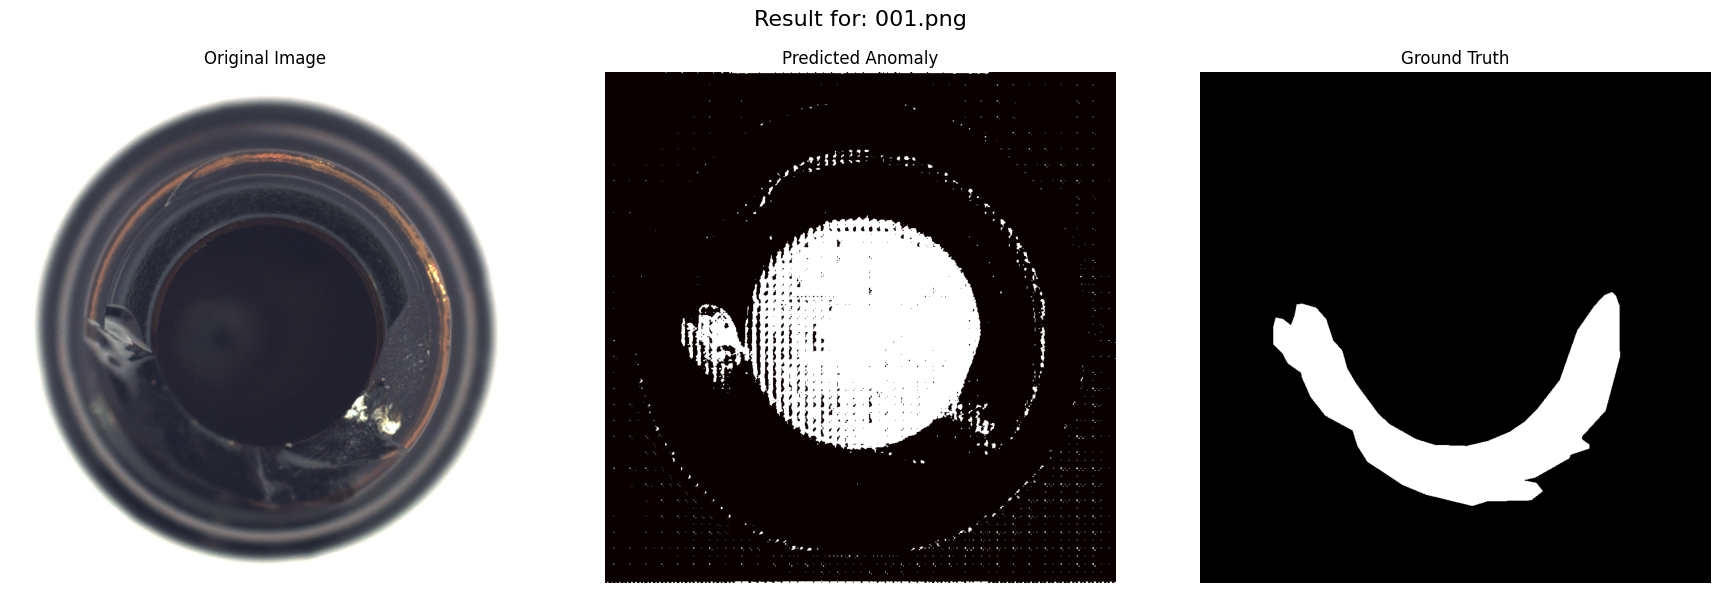


Processing 002.png...


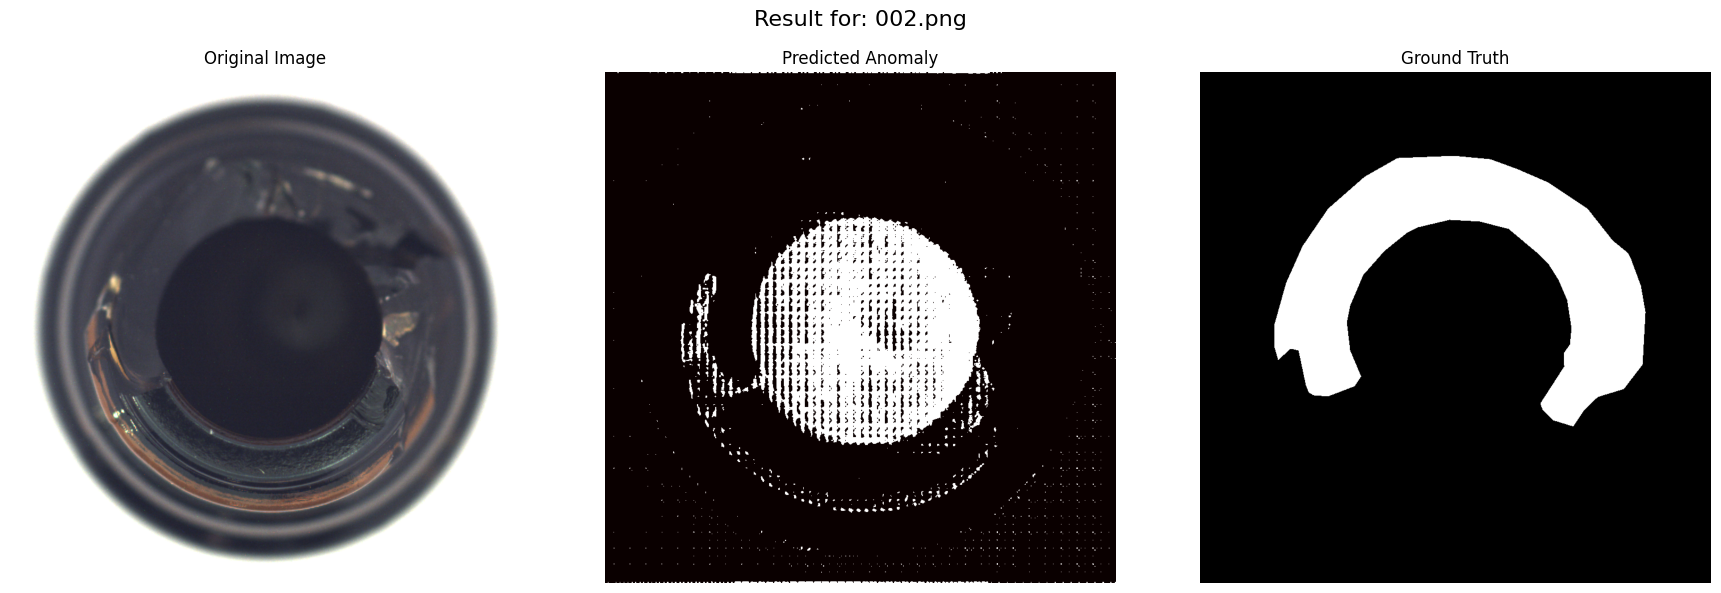


Processing 003.png...


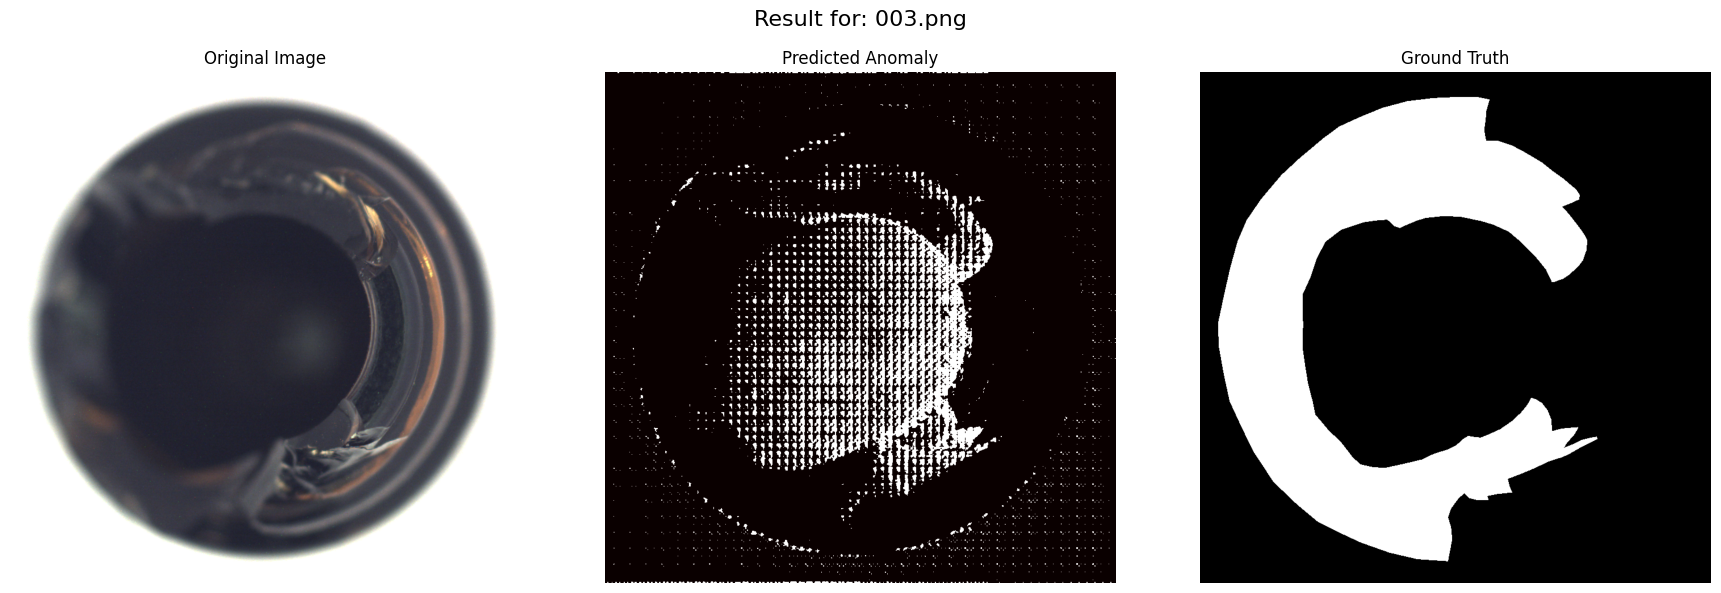


Processing 004.png...


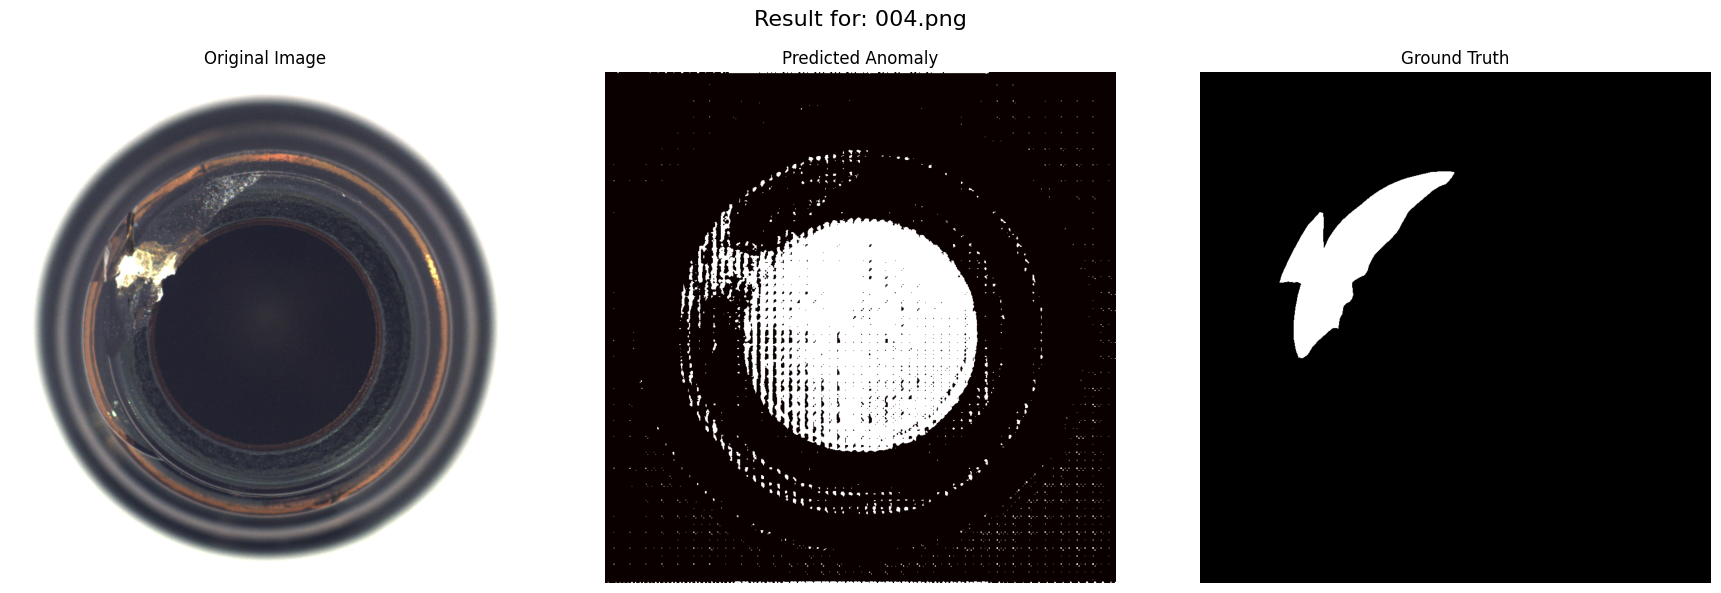


All images processed.


In [4]:
for i in range(len(image_files)):
    image_file = image_files[i]
    gt_file = gt_files[i]
    
    image_path = os.path.join(image_dir, image_file)
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    h, w, _ = image_rgb.shape

    if gt_file:
        gt_path = os.path.join(gt_dir, gt_file)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = gt_mask > 0
    else:
        gt_mask = np.zeros((h, w), dtype=bool)

    print(f"\nProcessing {image_file}...")
    predictor.set_image(image_rgb)

    x = np.linspace(0, w - 1, GRID_SIZE)
    y = np.linspace(0, h - 1, GRID_SIZE)
    xv, yv = np.meshgrid(x, y)
    input_points = np.stack([xv.flatten(), yv.flatten()], axis=1)
    input_labels = np.ones(input_points.shape[0])

    masks_logits, _, _ = predictor.predict(
        point_coords=input_points,
        point_labels=input_labels,
    )

    final_masks = masks_logits > 0.0

    combined_normal_mask = np.logical_or.reduce(final_masks)

    predicted_anomaly_map = np.invert(combined_normal_mask)

    plt.figure(figsize=(18, 6))
    plt.suptitle(f"Result for: {image_file}", fontsize=16)

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_anomaly_map, cmap='hot')
    plt.title("Predicted Anomaly")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(gt_mask, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

print("\nAll images processed.")

In [11]:
CLASS_NAME = "zipper"
image_dir = os.path.join(BASE_DIR, CLASS_NAME, "test", "broken_teeth")
gt_dir = os.path.join(BASE_DIR, CLASS_NAME, "ground_truth", "broken_teeth")

try:
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])[:NUM_IMAGES_TO_TEST]
    gt_files = []
    for f in image_files:
        gt_filename = f.replace(".png", "_mask.png")
        if os.path.exists(os.path.join(gt_dir, gt_filename)):
            gt_files.append(gt_filename)
        else:
            gt_files.append(None)

except FileNotFoundError:
    print(f"오류")
    exit()


Processing 000.png...


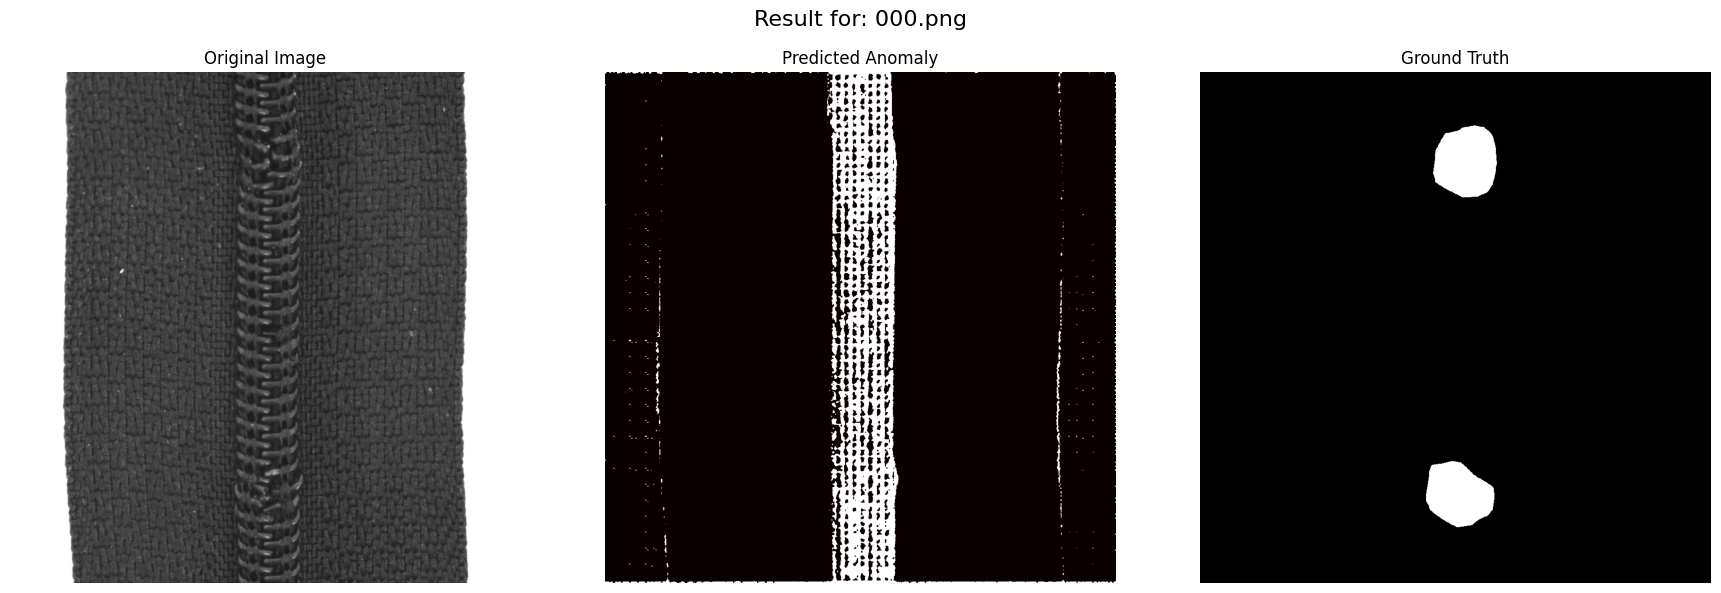


Processing 001.png...


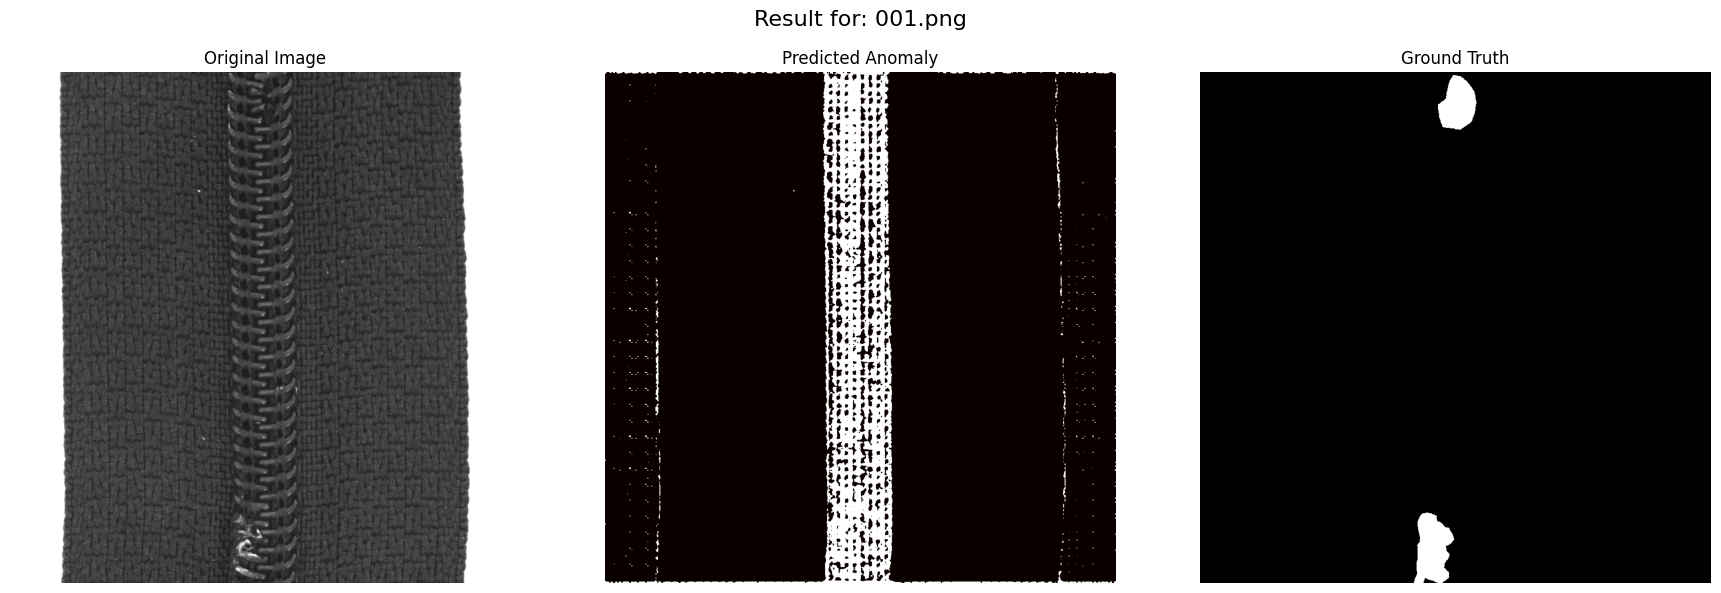


Processing 002.png...


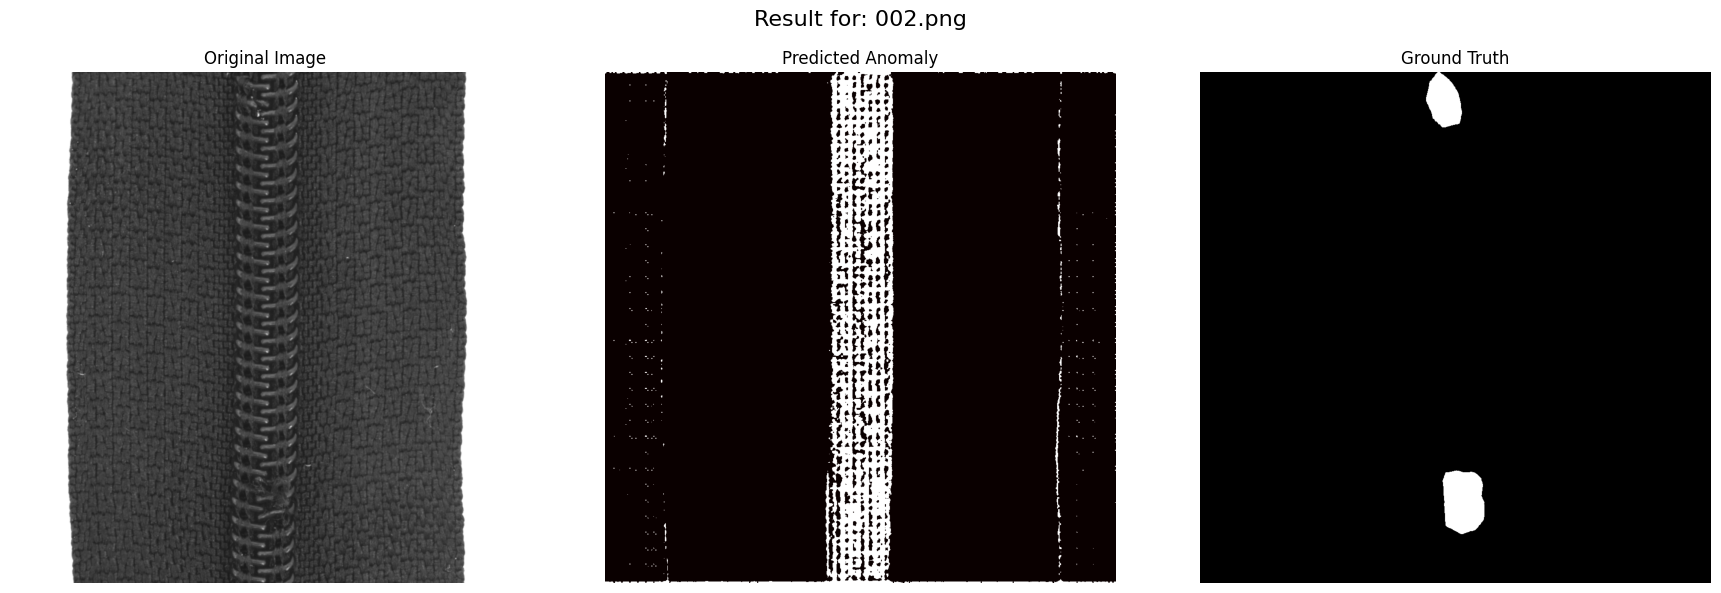


Processing 003.png...


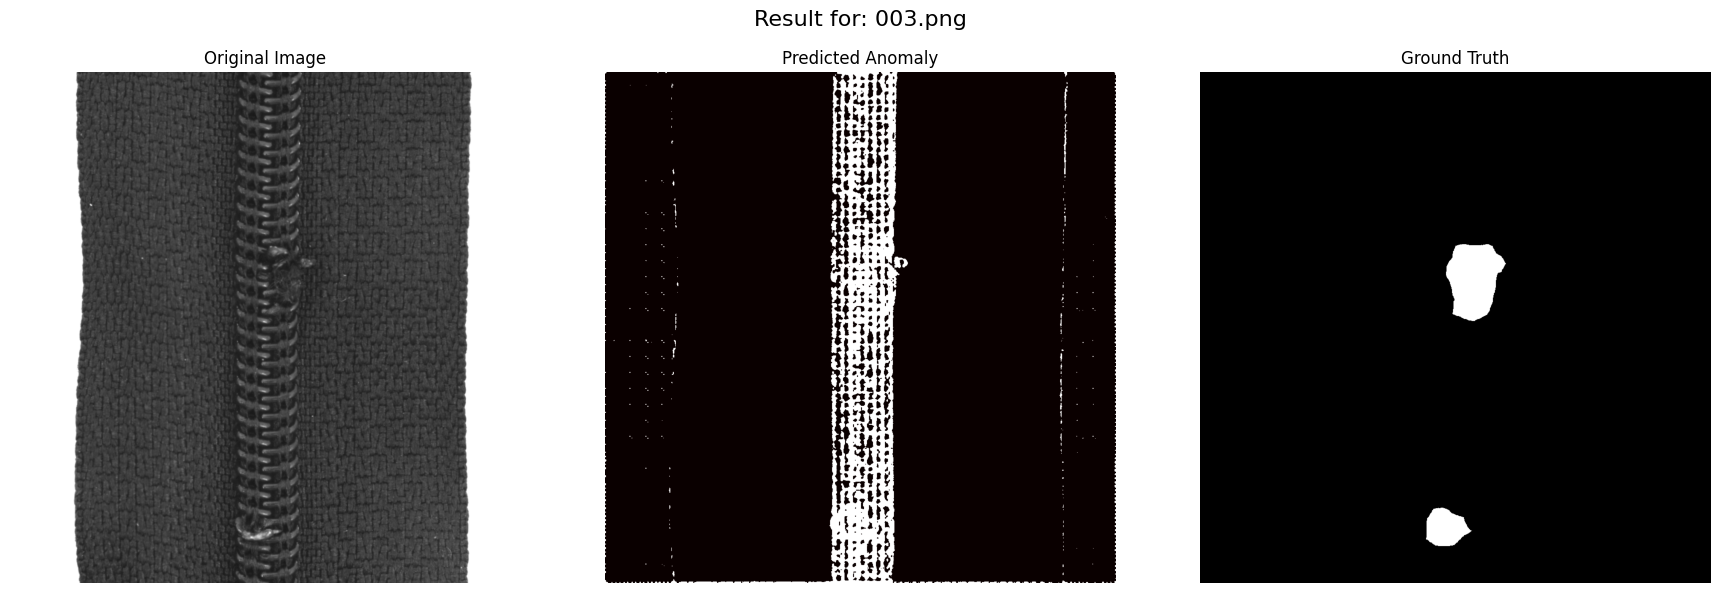


Processing 004.png...


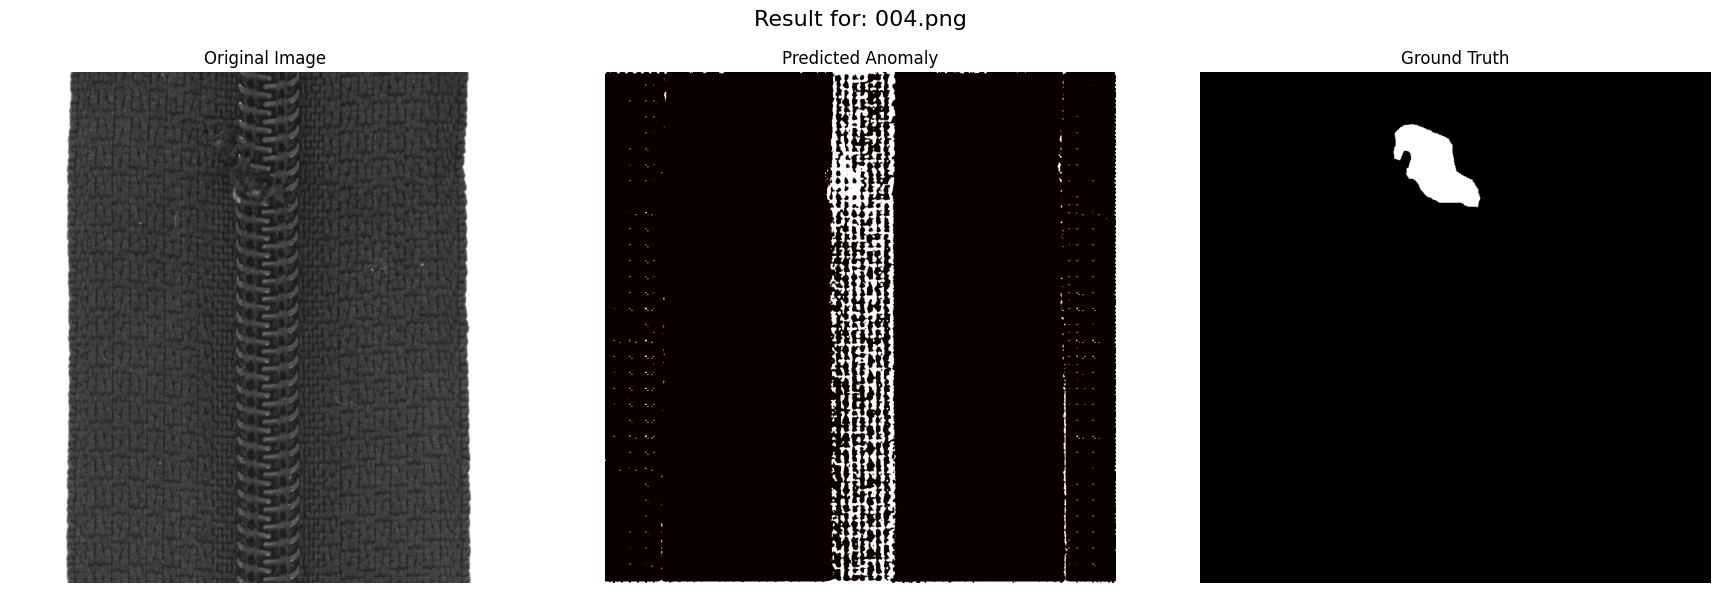


All images processed.


In [12]:
for i in range(len(image_files)):
    image_file = image_files[i]
    gt_file = gt_files[i]
    
    image_path = os.path.join(image_dir, image_file)
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    h, w, _ = image_rgb.shape

    if gt_file:
        gt_path = os.path.join(gt_dir, gt_file)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = gt_mask > 0
    else:
        gt_mask = np.zeros((h, w), dtype=bool)

    print(f"\nProcessing {image_file}...")
    predictor.set_image(image_rgb)

    x = np.linspace(0, w - 1, GRID_SIZE)
    y = np.linspace(0, h - 1, GRID_SIZE)
    xv, yv = np.meshgrid(x, y)
    input_points = np.stack([xv.flatten(), yv.flatten()], axis=1)
    input_labels = np.ones(input_points.shape[0])

    masks_logits, _, _ = predictor.predict(
        point_coords=input_points,
        point_labels=input_labels,
    )

    final_masks = masks_logits > 0.0

    combined_normal_mask = np.logical_or.reduce(final_masks)

    predicted_anomaly_map = np.invert(combined_normal_mask)

    plt.figure(figsize=(18, 6))

    plt.suptitle(f"Result for: {image_file}", fontsize=16)

    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(predicted_anomaly_map, cmap='hot')
    plt.title("Predicted Anomaly")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(gt_mask, cmap='gray')
    plt.title("Ground Truth")
    plt.axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

print("\nAll images processed.")

# # Inversion mask

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

checkpoint_path = "./checkpoints/sam2.1_hiera_large.pt"
model_cfg_path = "configs/sam2.1/sam2.1_hiera_l.yaml"
image_path = "/home/s2behappy4/data/gyuhyeong/dataset/MMAD/MVTec-AD/leather/test/color/000.png"

predictor = SAM2ImagePredictor(build_sam2(model_cfg_path, checkpoint_path, device=device))
print("SAM2ImagePredictor has been initialized.")

Using device: cuda
SAM2ImagePredictor has been initialized.


Image loaded and set to predictor. Image shape: (1024, 1024, 3)
Generated 1024 points. Predicting masks...
Prediction complete.
Total masks to visualize: 3


/var/tmp/ipykernel_24995/3527547027.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  random_color = plt.cm.get_cmap("hsv")(idx / len(masks))[:3]


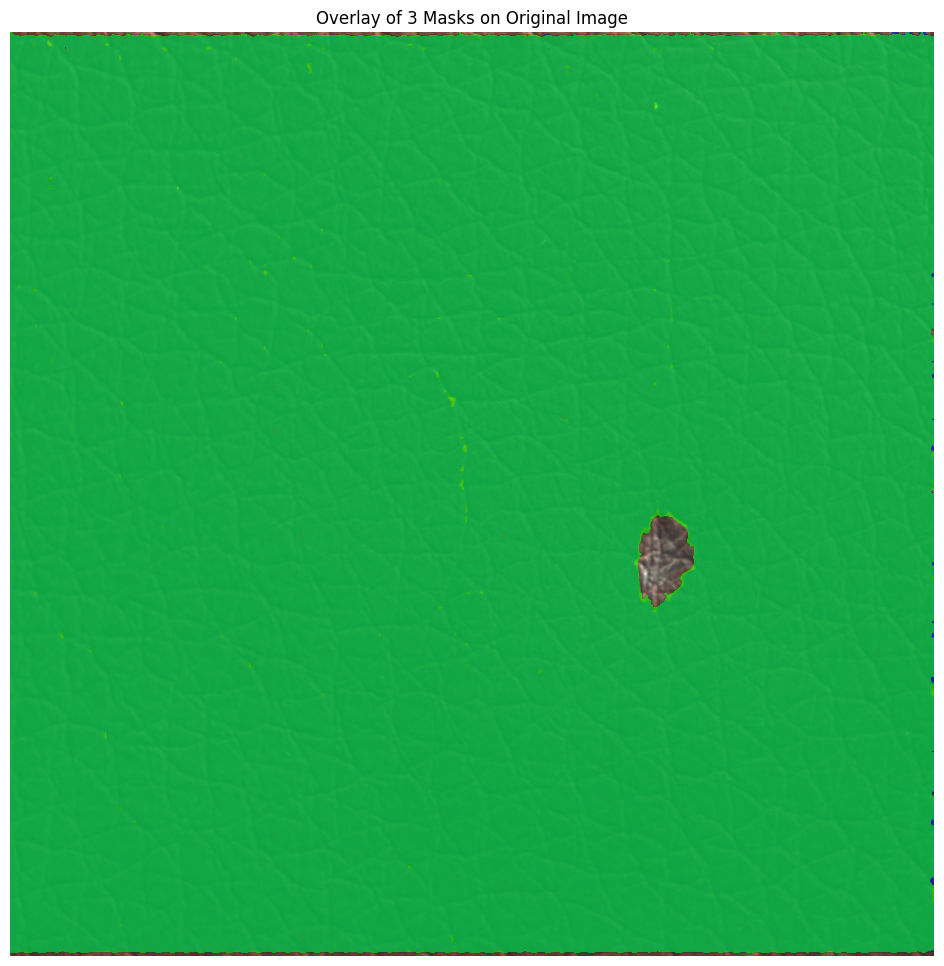

In [2]:
image_bgr = cv2.imread(image_path)
if image_bgr is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

predictor.set_image(image_rgb)
print(f"Image loaded and set to predictor. Image shape: {image_rgb.shape}")

GRID_SIZE = 32
h, w, _ = image_rgb.shape
x = np.linspace(0, w - 1, GRID_SIZE)
y = np.linspace(0, h - 1, GRID_SIZE)
xv, yv = np.meshgrid(x, y)
input_points = np.stack([xv.flatten(), yv.flatten()], axis=1)
input_labels = np.ones(input_points.shape[0])

print(f"Generated {len(input_points)} points. Predicting masks...")
masks_logits, scores, _ = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True,
)
print("Prediction complete.")

best_masks_logits = masks_logits

final_masks = best_masks_logits > 0.0

print(f"Total masks to visualize: {len(final_masks)}")

def show_masks_on_image(image, masks):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    
    ax = plt.gca()
    ax.set_autoscale_on(False)

    indexed_masks = sorted(enumerate(masks), key=(lambda x: np.sum(x[1])), reverse=False)

    for idx, mask in indexed_masks:
        color_mask = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.float32)
        random_color = plt.cm.get_cmap("hsv")(idx / len(masks))[:3]
        color_mask[mask] = [*random_color, 0.6]      
        ax.imshow(color_mask)
        
    plt.title(f"Overlay of {len(masks)} Masks on Original Image")
    plt.axis("off")
    plt.show()

show_masks_on_image(image_rgb, final_masks)

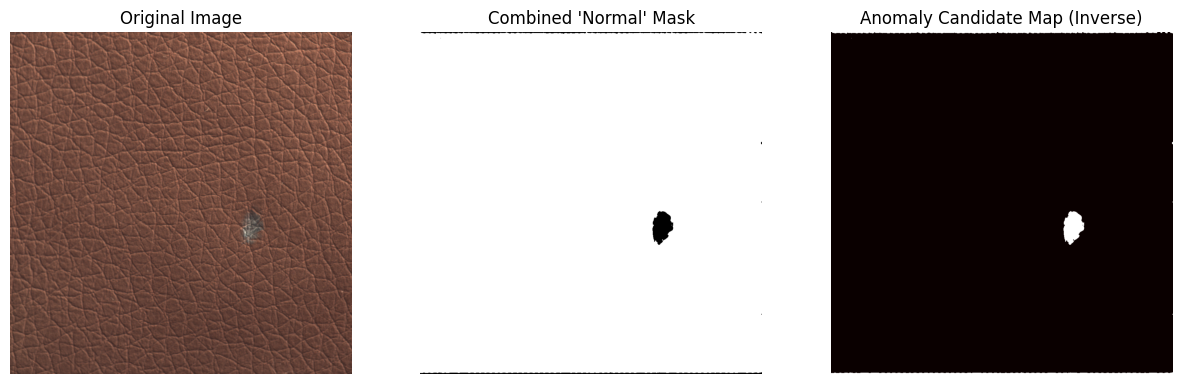

In [4]:
combined_mask = np.logical_or.reduce(final_masks)

anomaly_candidate_map = np.invert(combined_mask)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title("Combined 'Normal' Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(anomaly_candidate_map, cmap='hot')
plt.title("Anomaly Candidate Map (Inverse)")
plt.axis('off')

plt.show()